
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## 2. Данные

In [3]:
try:
    df = pd.read_csv('churn.csv') 
except FileNotFoundError:
    print("You have to load the file to the directory before opening it.")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = [i.lower() for i in df.columns.to_list()]

## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [7]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.monthlycharges.value_counts(bins=10).sort_index()

(18.148999999999997, 28.3]    1606
(28.3, 38.35]                  191
(38.35, 48.4]                  365
(48.4, 58.45]                  640
(58.45, 68.5]                  474
(68.5, 78.55]                  893
(78.55, 88.6]                  953
(88.6, 98.65]                  873
(98.65, 108.7]                 754
(108.7, 118.75]                294
Name: count, dtype: int64

**Вывод:**
- большая часть клиентов не пожилые люди;
- период обслуживания составлял от 0 до 72 месяцев,
большая часть клиентов обслуживалась 29 месяцев,
разброс данных небольшой;
- ежемесячный клиентский платеж имеет разброс, 
платежи составляют от 18.25 до 118.75

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [9]:
df.describe(include='object').T

,count,unique,top,freq
customerid,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phoneservice,7043,2,Yes,6361
multiplelines,7043,3,No,3390
internetservice,7043,3,Fiber optic,3096
onlinesecurity,7043,3,No,3498
onlinebackup,7043,3,No,3088
deviceprotection,7043,3,No,3095


In [10]:
cat_features = df.select_dtypes(include='object').columns
for col in cat_features:
    print(f'Столбец {df[col].value_counts()}', end='\n\n')

Столбец customerid
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Столбец gender
Male      3555
Female    3488
Name: count, dtype: int64

Столбец partner
No     3641
Yes    3402
Name: count, dtype: int64

Столбец dependents
No     4933
Yes    2110
Name: count, dtype: int64

Столбец phoneservice
Yes    6361
No      682
Name: count, dtype: int64

Столбец multiplelines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Столбец internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Столбец onlinesecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Столбец onlinebackup
No                     3088
Yes                    2429
No internet service    1526
Name: cou

**Вывод:**
- Столбец totalcharges имеет 90% уникальных значений и тип данных object, скорее всего его нужно перевести в числовой тип.

    Перед переводом необходимо проверить на пропуски. 

ВОПРОС: корректно ли делать такую предобработку в описании датасета?
- Столбцы partner, dependents, phoneservice, paperlessbilling и churn бинарные, имеют по 2 уникальных значения Yes/No.
- Столбец gender содержит 2 пола
- Столбец customerid содержит уникальные айди
- Остальные столбцы содержат 2-4 уникальных значения.

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [11]:
print(f'Количество дубликатов: {df[df.duplicated()].shape[0]}')

Количество дубликатов: 0


### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [12]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [13]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца totalcharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [14]:
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors = 'coerce')

df[df["totalcharges"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [15]:
df.sample(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5401,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,638.55,No
5350,1172-VIYBP,Male,0,Yes,Yes,53,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,No
942,7567-ECMCM,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.85,2001.00,No
6659,3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.30,6719.90,No
3937,5712-VBOXD,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,68.45,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [16]:
df[(df['totalcharges'] / df['monthlycharges']) == df['tenure']].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [17]:
print('Количество совпадений по нашей теории:')
print(df[(df['totalcharges'] / df['monthlycharges']) == df['tenure']]['customerid'].count())
print('Количество различий:')
print(df[(df['totalcharges'] / df['monthlycharges']) != df['tenure']]['customerid'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [18]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['monthlycharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['totalcharges']).mean() * 100)

print(f'В среднем new_total отличается от totalcharges на {perc:.4f}%')

В среднем new_total отличается от totalcharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [19]:
df.fillna({'totalcharges': 0}, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [20]:
df.totalcharges = df.totalcharges.astype(np.float64)
df.seniorcitizen = df.seniorcitizen.astype('object')

**Вывод:**
Были заполнены пропуски в столбце totalcharges на основании данных двух других столбцов (значит у них будет высокая корреляция),
тип данных заменен на числовой.
Столбец seniorcitizen переведем в категориальный, так как он содержит значения 1 и 0.

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.
Нулевая гипотеза - количество месяцев равное.

In [21]:
churn_no = df.loc[df.churn == 'No']#, ['tenure']].tenure
churn_yes = df.loc[df.churn == 'Yes']#', ['tenure']].tenure
print(churn_no.shape, churn_yes.shape)


(5174, 21) (1869, 21)


In [22]:
alpha = .05

_, pvalue = stats.ttest_ind(churn_no.tenure.sample(1000), churn_yes.tenure.sample(1000))

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод:**
Для проверки гипотезы проведен тест t-критерия Стьюдента, который подтвердил, что среднее количество месяцев между выборками отличается.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответствуют ли распределения нормальному?

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'monthlycharges'}>],
       [<Axes: title={'center': 'totalcharges'}>, <Axes: >]], dtype=object)

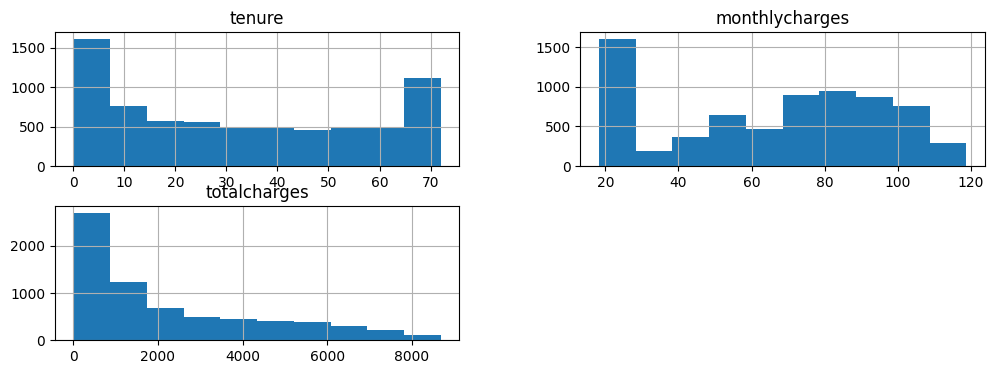

In [23]:
df.hist(figsize=(12,4), bins=10)

In [24]:
num_features = df.select_dtypes(include='number')

for feat in num_features:
    _, pvalue = stats.normaltest(df[feat])
    alpha = 0.05

    if pvalue < alpha:
        print(f'Столбец {feat} - p-value:{pvalue:.5f}. Распределение не соответствует нормальному')
    else:
        print(f'Столбец {feat} - p-value:{pvalue:.5f}. Распределение нормальное')

Столбец tenure - p-value:0.00000. Распределение не соответствует нормальному
Столбец monthlycharges - p-value:0.00000. Распределение не соответствует нормальному
Столбец totalcharges - p-value:0.00000. Распределение не соответствует нормальному


**Вывод:**
Распределение в числовых признаках нормальному не соответствует, это видно на гистограммах и с помощью теста Д'Агостино.

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

Столбец с айди нам не понадобится, так как есть индексы.

In [25]:
del df['customerid']

Переведем категориальные столбцы в числовые значения.

Столбцы с тремя значениями, включая "No internet service" обозначим по следующему принципу.

In [26]:
repl = {'Yes': 1, 'No': 2, 'No internet service': 0}
repl_features = ['onlinesecurity', 'onlinebackup', 'deviceprotection', \
                    'techsupport', 'streamingtv', 'streamingmovies']
for col in repl_features:
    df[col] = df[col].map(repl)

In [27]:
cat_features = df.select_dtypes(include='object').columns
for col in cat_features:
    df[col] = pd.factorize(df[col])[0]

In [28]:
df['churn'] = df['churn'].astype('bool')

Из данных по уникальным значениям очевидно, что столбцы multiplelines и phoneservice дублируют друг друга.
Можно удалить столбец phoneservice, так как он менее информативен

In [29]:
del df['phoneservice']

### Введем гипотезы:
- Нулевая гипотеза - целевой признак зависит от другого признака.
- Альтернативная - независит.


In [30]:
df.groupby(['churn']).agg(['mean'])

,gender,seniorcitizen,partner,dependents,tenure,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
churn,,,,,,,,,,,,,,,,,,
False,0.507344,0.128721,0.471782,0.344801,37.569965,1.310978,0.893893,1.120603,1.085427,1.091032,1.118670,1.087940,1.083881,0.889254,0.464438,1.497101,61.265124,2549.911442
True,0.497592,0.254682,0.642055,0.174425,17.979133,1.363831,0.814874,1.721241,1.599251,1.587480,1.713216,1.443553,1.441413,0.140182,0.250936,0.813269,74.441332,1531.796094


*Числовые признаки*: tenure, monthlycharges, totalcharges.

Для числовых признаков применим точечно-бисериальную корреляцию, так как она подходит для оценки связи между числовыми и бинарными признаками.

In [31]:
alpha = .7

for col in num_features:
    coef = stats.pointbiserialr(df[col], df['churn'])[0]
    if abs(coef) >= alpha:
        print(f'Признак {col} зависимый, коэффициент = {coef:.5f}.')
    else:
        print(f'Признак {col} независимый, коэффициент = {coef:.5f}.')


Признак tenure независимый, коэффициент = -0.35223.
Признак monthlycharges независимый, коэффициент = 0.19336.
Признак totalcharges независимый, коэффициент = -0.19832.


Посмотрим взаимодействие между этими признаками, так как выше один был рассчитан на основании другого.

In [32]:
nums = num_features.columns
for i in range(0, len(nums) - 1 ):
    for j in range(i + 1, len(nums)):
        correlation, pvalue = stats.pearsonr(df[nums[i]], df[nums[j]])
        print(f'Корреляция между {nums[i]} и {nums[j]} равна: {correlation:.5f}, p: {pvalue:}')

Корреляция между tenure и monthlycharges равна: 0.24790, p: 4.09404499149396e-99
Корреляция между tenure и totalcharges равна: 0.82618, p: 0.0
Корреляция между monthlycharges и totalcharges равна: 0.65117, p: 0.0


In [33]:
df.groupby('churn')[['tenure', 'monthlycharges', 'totalcharges']].agg(['std', 'median', 'mean'])

tenure                   monthlycharges                     \
             std median       mean            std  median       mean   
churn                                                                  
False  24.113777   38.0  37.569965      31.092648  64.425  61.265124   
True   19.531123   10.0  17.979133      24.666053  79.650  74.441332   

      totalcharges                         
               std    median         mean  
churn                                      
False  2329.954215  1679.525  2549.911442  
True   1890.822994   703.550  1531.796094

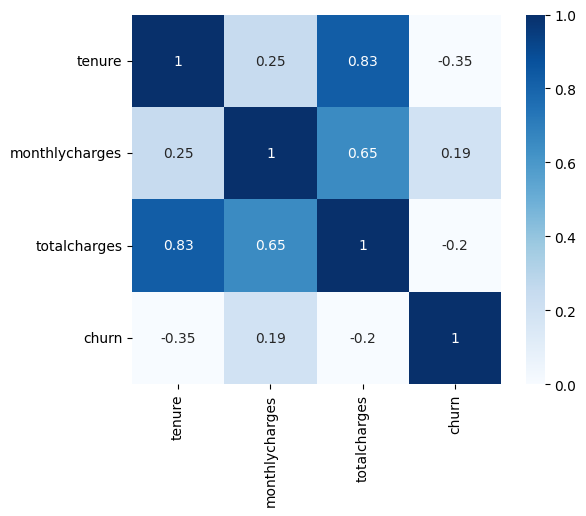

In [34]:
sns.heatmap(df[['tenure', 'monthlycharges', 'totalcharges', 'churn']].corr(),
            cmap='Blues',
            square=True,
            vmin=0, 
            annot=True);

#### Вывод:
На основании высокой корреляции столбцов tenure и totalcharges есть смысл удалить последний.

In [35]:
del df['totalcharges']

*Категориальные признаки*: gender, seniorcitizen, partner, dependents, phoneservice, paperlessbilling, multiplelines, internetservice, onlinesecurity,onlinebackup', deviceprotection, techsupport, streamingtv, streamingmovies, contract, paymentmethod

Их можно разделить на:
- порядковые
- бинарные
- номинальные

*Бинарные признаки*: seniorcitizen, partner, dependents, phoneservice, paperlessbilling

Рассмотрим взаимодействие целевой переменной с бинарными признаками с помощью коэффициента Phi.



In [36]:
df['churn'] = df['churn'].astype('bool')

In [37]:
bin_features = df[['seniorcitizen', 'partner', 'dependents', 'paperlessbilling', 'churn']]
bin_features = bin_features.astype('bool')

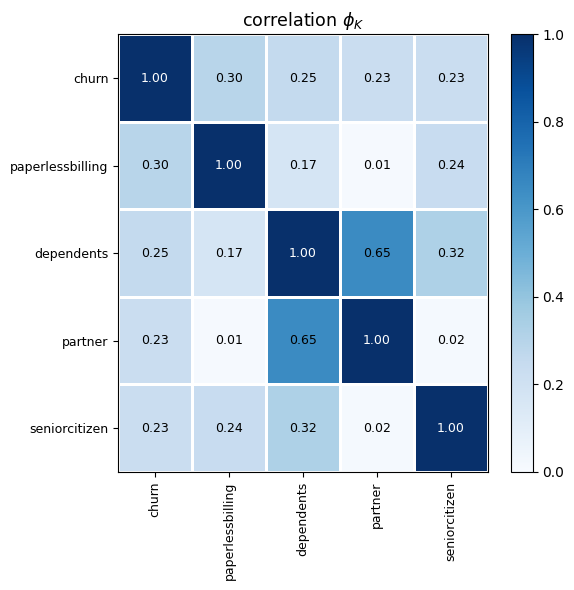

In [38]:
phik_overview = bin_features.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(6, 6))
plt.tight_layout()

#### Вывод:
Мы видим довольно высокую (0,65) корреляцию между столбцами partner и dependents . Действительно, скорее всего человек являющийся кормильцем семьи, находится в браке. Можно попробовать сложить эти признаки и поработать с ними как с номинальными.

*Порядковые признаки*: contract.

Рассмотрим взаимодействие целевой переменной с порядковым признаком с помощью коэффициента Кендалла (1 : -1).

In [39]:
correlation, pvalue = stats.kendalltau(df.churn, df.contract)
print(f'Корреляция между churn и contract равна: {correlation:.5f}, p: {pvalue}')

Корреляция между churn и contract равна: -0.38691, p: 9.65837063516784e-255


*Номинальные признаки*: multiplelines, internetservice, onlinesecurity,

onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, paymentmethod, gender

Рассмотрим взаимодействие целевой переменной с Номинальные признаком с помощью коэффициента Крамера (0 : 1).

In [40]:
nom_features = df[['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', \
                    'techsupport', 'streamingtv', 'streamingmovies', 'paymentmethod', 'gender']]

In [41]:
def cramers_V(col1,col2) :
    crosstab =np.array(pd.crosstab(col1,col2, rownames=None, colnames=None))
    statistics = stats.chi2_contingency(crosstab)[0]
    obs_count = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape) - 1 # Minimum value between columns and rows of the cross table
    return (statistics/(obs_count*mini))

In [42]:
for col in nom_features:
    coef = cramers_V(df['churn'], df[col])
    print(f'Корреляция между churn и {col}: {round(coef, 5)}')


Корреляция между churn и multiplelines: 0.00161
Корреляция между churn и internetservice: 0.10398
Корреляция между churn и onlinesecurity: 0.12069
Корреляция между churn и onlinebackup: 0.08545
Корреляция между churn и deviceprotection: 0.07929
Корреляция между churn и techsupport: 0.11759
Корреляция между churn и streamingtv: 0.05313
Корреляция между churn и streamingmovies: 0.05334
Корреляция между churn и paymentmethod: 0.09203
Корреляция между churn и gender: 7e-05


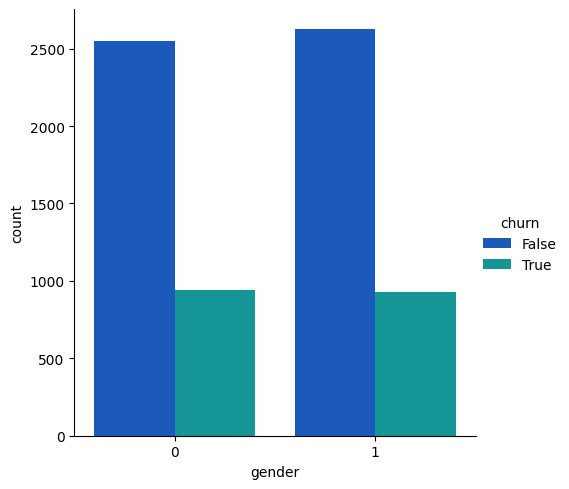

In [43]:
sns.catplot(x='gender', hue = 'churn', kind = 'count', data = df, palette='winter')

#### Вывод:

Видно, что столбец  gender не оказывает никакого влияния на целевую переменную.

Остальные столбцы тоже не обладают высокой корреляцией.
Исходя из значений средних, p-value Можно предположить, что есть связь между столбцами.
Соответственно, поработать над со столбцами, где одно из значений "отсутствие интернета".



## Работа с данными

Введем новый столбец на основании: partner и dependents.
И посмотрим его связь с таргетом.

In [44]:
crosstab = pd.crosstab(df.partner, df.dependents)
_, pvalue, _, _ = stats.chi2_contingency(crosstab)

alpha = 0.05
if pvalue <= alpha:
    print(f'Зависимый, p-value: {pvalue}')
else:
    print(f'Независимый, p-value: {pvalue}')

Зависимый, p-value: 0.0


In [45]:
df['partner_dependents'] = df['partner'] * df['dependents']
df.drop(columns=['partner', 'dependents'], axis=1, inplace=True)

In [46]:
crosstab = pd.crosstab(df.churn, df.partner_dependents)
_, pvalue, _, _ = stats.chi2_contingency(crosstab)

alpha = 0.05
if pvalue <= alpha:
    print(f'Зависимый, p-value: {pvalue}')
else:
    print(f'Независимый, p-value: {pvalue}')

Зависимый, p-value: 0.025131173865406798


Посмотрим на связь стобцов со значением 'No internet service' и целевой переменной.

In [47]:
df.groupby('churn')[['streamingtv', 'streamingmovies', 'techsupport', \
                      'onlinesecurity', 'onlinebackup', 'deviceprotection']].agg(['std', 'mean', 'var']).T

churn                     False     True 
streamingtv      std   0.791530  0.606573
                 mean  1.087940  1.443553
                 var   0.626520  0.367931
streamingmovies  std   0.789403  0.606370
                 mean  1.083881  1.441413
                 var   0.623158  0.367685
techsupport      std   0.806787  0.570643
                 mean  1.118670  1.713216
                 var   0.650906  0.325634
onlinesecurity   std   0.807698  0.567578
                 mean  1.120603  1.721241
                 var   0.652377  0.322145
onlinebackup     std   0.790217  0.601051
                 mean  1.085427  1.599251
                 var   0.624443  0.361263
deviceprotection std   0.793133  0.602878
                 mean  1.091032  1.587480
                 var   0.629059  0.363462

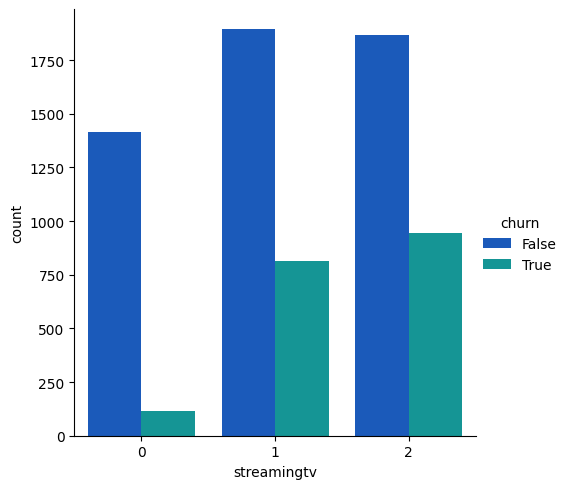

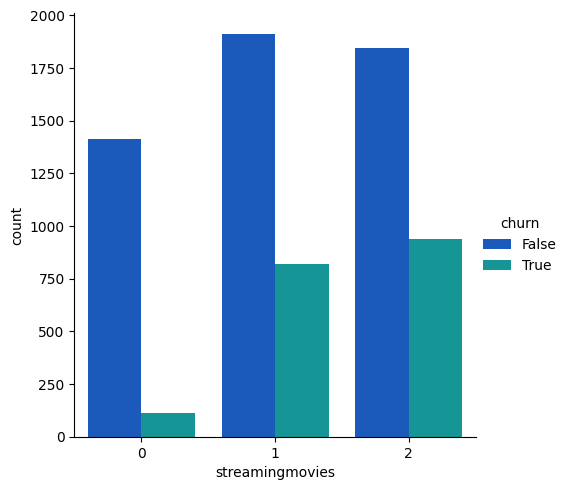

In [48]:
sns.catplot(x='streamingtv', hue = 'churn', kind = 'count', data = df, palette='winter')
sns.catplot(x='streamingmovies', hue = 'churn', kind = 'count', data = df, palette='winter')

Мы видим, что значения очень близки. Можно попробовать заменить эти значения на одно, например, на их сумму.

In [49]:
df['all_services'] = df['onlinesecurity'] + df['onlinebackup'] + df['deviceprotection'] + \
                    df['techsupport'] + df['streamingtv'] +  df['streamingmovies']
df.drop(columns=['onlinesecurity', 'onlinebackup','deviceprotection',\
        'techsupport', 'streamingtv', 'streamingmovies'], axis=1, inplace=True)

In [50]:
df.all_services.value_counts()

all_services
0     1526
9     1118
10    1033
11     966
8      852
12     693
7      571
6      284
Name: count, dtype: int64

In [51]:
correlation, pvalue = stats.kendalltau(df.churn, df.all_services)
alpha = 0.05
if pvalue <= alpha:
    print(f'Зависимый, p-value: {pvalue}')
else:
    print(f'Независимый, p-value: {pvalue}')

Зависимый, p-value: 3.466555888018165e-190


Phik - корреляция

interval columns not set, guessing: ['gender', 'seniorcitizen', 'tenure', 'multiplelines', 'internetservice', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'partner_dependents', 'all_services']


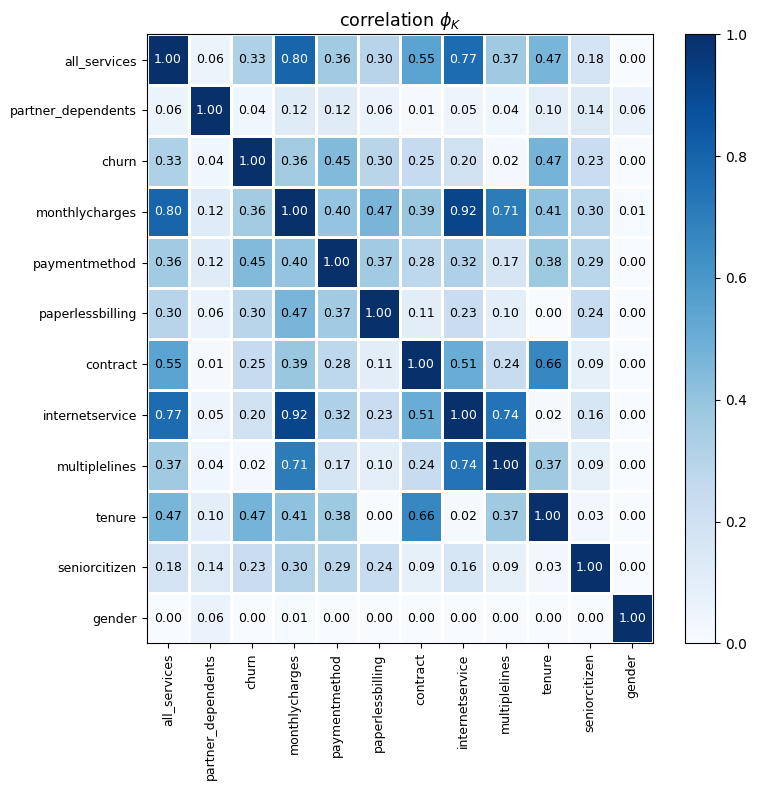

In [52]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(8, 8))
plt.tight_layout()

По имеющимся данным, значимыми для целевой переменной признаками являются:
- tenure
- paymentmethod
- monthlycharges
- искусственный признак, суммирующий подключенные сервисы

В данных остались столбцы с высокой корреляцией, с которыми еще желательно поработать.

ВОПРОС: что можно сделать с ними? вывести новый признак? удалить? ведь очевидно, что сервисы и платеж зависимы

Посмотрим на связь таргета с этими признаками поближе.

In [53]:
df.groupby('tenure').churn.sum().sort_values(ascending=False).to_frame()

,churn
tenure,
1,380
2,123
3,94
4,83
5,64
...,...
44,6
62,5
64,4


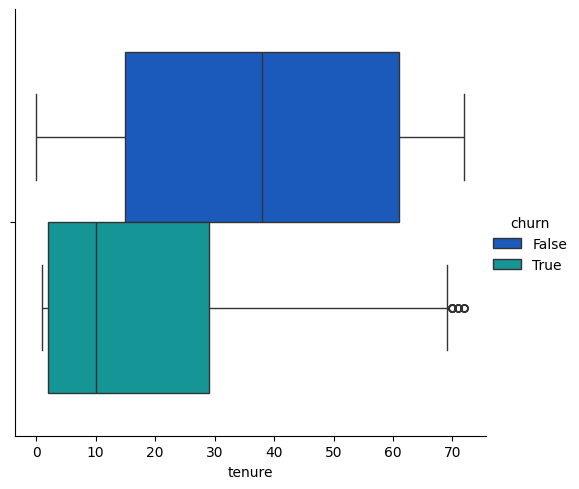

In [54]:
sns.catplot(x='tenure', hue = 'churn', kind = 'box', data = df, palette='winter')

По графику видно, что клиент уходит в среднем через 10 месяцев договора.

array([<Axes: ylabel='churn_true'>], dtype=object)

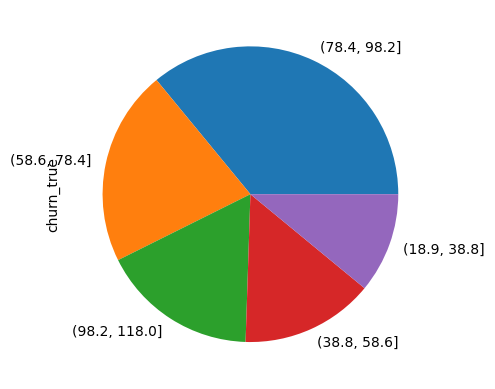

In [107]:
df.loc[df.churn == 1].monthlycharges.round().value_counts(bins=5)\
                                            .to_frame(name='churn_true')\
                                            .plot(kind='pie', subplots=True, legend=False)

array([<Axes: ylabel='churn_false'>], dtype=object)

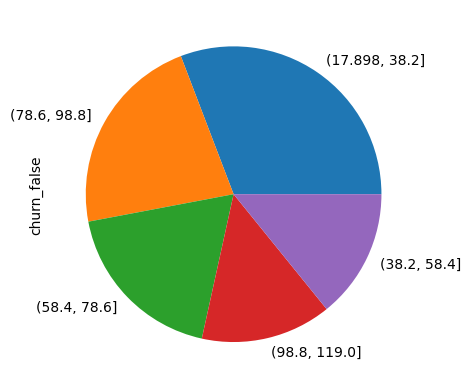

In [108]:
df.loc[df.churn == 0].monthlycharges.round().value_counts(bins=5)\
                                            .to_frame(name='churn_false')\
                                            .plot(kind='pie', subplots=True, legend=False)

Видно, что уходят клиенты с более высокими ежемесячными тратами.

In [113]:
pd.crosstab(df.paymentmethod, df.churn, margins=True)

churn,False,True,All
paymentmethod,,,
0,1294,1071,2365
1,1304,308,1612
2,1286,258,1544
3,1290,232,1522
All,5174,1869,7043


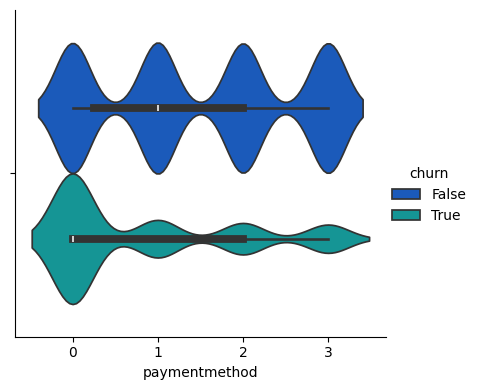

In [120]:
sns.catplot(x='paymentmethod', hue = 'churn', kind = 'violin', data = df, palette='winter', height=4)

Самый большой отток среди клиентов, использующих электронный чек.

In [115]:
pd.crosstab(df.all_services, df.churn, margins=True)

churn,False,True,All
all_services,,,
0,1413,113,1526
6,269,15,284
7,500,71,571
8,662,190,852
9,812,306,1118
10,663,370,1033
11,524,442,966
12,331,362,693
All,5174,1869,7043


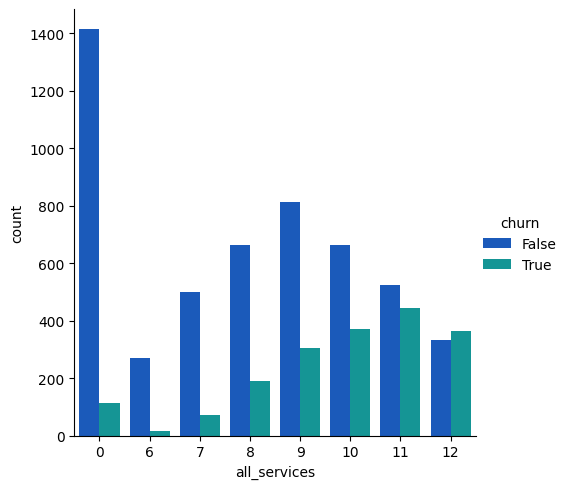

In [133]:
sns.catplot(x='all_services', hue = 'churn', kind = 'count', data = df, palette='winter')

Больший отток среди клиентов, которые использовали больше сервисов.

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Клиента уходит в среднем через 10 месяцев договора, затем этот риск снижается.
Возмонжо, стоит уделять клиенту дополнительное внимание в этот период.

Больше уходит клиентов, использующих больше услуг, имеющий более высокий ежемесячный платеж и применяющих при оплате электронный чек.
Возможно, какие-то услуги подключены автоматически, и можно предлождить клиенту снизить чек, убрав их.
Либо сравнить цены с конкурентами.
